In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

from ggmap.readwrite import read_clade2otus_map
from ggmap.utils import convert_profiles

In [2]:
mp2gg_map = read_clade2otus_map('Cache/metaphlan_to_gg13_5-97.txt')
tax = pd.read_csv('Cache/97_otu_taxonomy.txt', sep='\t', names=['lineage'], index_col=0)

In [3]:
path = 'examples/'
files_profile = [path + 'example_v6_t3.metaphlan',
                 path + 'example_v6_t6.metaphlan',
                 path + 'example_v6_t9.metaphlan',
                 path + 'example_v9_t3.metaphlan',
                 path + 'example_v9_t6.metaphlan',
                 path + 'example_v9_t9.metaphlan']
counts = convert_profiles(files_profile, mp2gg_map, "armpit ")

In [4]:
rank = 1 # 'Phylum'

taxes = []
for idx, row in counts.iterrows():
    taxes.append(tax.loc[idx,'lineage'].split('; ')[rank])
    
counts['tax'] = taxes   
y = counts.groupby('tax').sum()

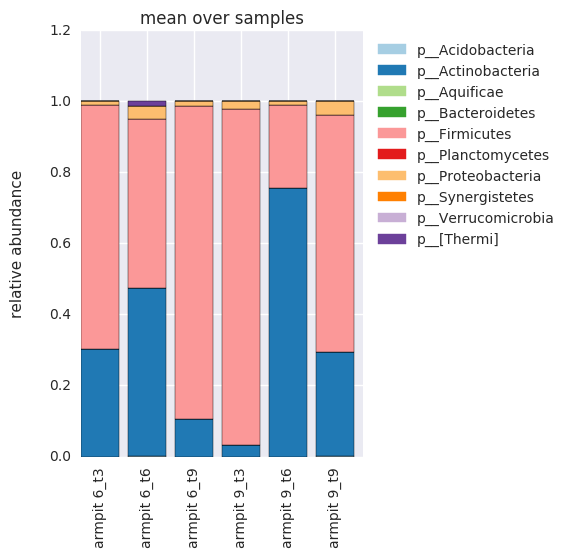

In [5]:
colorHash= {}
availColors = sns.color_palette('Paired', 100)

ax = plt.subplot(1, 2, 2)
width = 0.80
ind = list(range(0, y.shape[1]))
bottom = [0] * y.shape[1]
for taxon, abundances in y.loc[y.index, ].iterrows():
    if taxon not in colorHash:
        colorHash[taxon] = availColors[len(colorHash) % len(availColors)]
    p2 = plt.bar(ind, abundances.values, bottom=bottom, label=taxon, color=colorHash[taxon], width=width)
    bottom += abundances.values

p = plt.title('mean over samples')
p = plt.xticks([p + width/2.0 for p in ind], list(y.columns), rotation='vertical')
p = plt.ylabel('relative abundance\n')

l_patches = []
for taxon in y.index:
    l_patches.append(mpatches.Patch(color=colorHash[taxon], label=taxon))
p = ax.legend(handles=l_patches, loc='upper left', bbox_to_anchor=(1.01, 1))